### pandas, matplotlib, numpy import 하기

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

### 한국어 그래프 생성용

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.TTF"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

### 선수 파일열기/ 개요 확인

In [1]:
Player_Data = pd.read_csv('epl_players_18_19.csv')

Player_Data.info()

NameError: name 'pd' is not defined

# I) 기존 데이터 시각화 재현하기

### 데이터 순위 찾는 함수 organize_data()

In [4]:
def organize_data(a):
    
    # A. 데이터 중 득점 관련 데이터 추출, 득점 많은 순으로 정렬
    goals = Player_Data[['full_name', 'Current Club', 'nationality', a]]
    goals_Chart = goals.sort_values( by = a, ascending = False)
    
    # B. 표 합치기 용 인덱스 지정
    rank_list = []
    num_players = 572

    index = []
    for i in range(1, num_players+1):
        index.append(i-1)
        i+=1

    goals_Chart.index = index

    # C. 순위 표시하는 리스트 만들기
    count = 0
    
    rank_list.append(1)
    for i in range(0, num_players-1):
        if(int(goals_Chart.iloc[i, 3]) != int(goals_Chart.iloc[i+1, 3])):
            count = i + 1
        rank_list.append(count+1)
        i+=1
        
    # 순위 리스트와 기존 표 합치기, 출력    
    Player_Data['순위']= rank_list

    fin_goals = pd.concat([Player_Data['순위'], goals_Chart], axis = 1)

    display(fin_goals.head(10))
    
    fin_goals.index = fin_goals['full_name']
    x = fin_goals[a].head(10).sort_values().plot(kind = 'barh', grid = True, figsize = (10, 5))
    plt.show()

### 실행해보기

,순위,full_name,Current Club,nationality,goals_overall
0,1,Sadio Mané,Liverpool,Senegal,22
1,1,Mohamed Salah,Liverpool,Egypt,22
2,1,Pierre-Emerick Aubameyang,Arsenal,Gabon,22
3,4,Sergio Aguero,Manchester City,Argentina,21
4,5,Jamie Vardy,Leicester City,England,18
5,6,Raheem Sterling,Manchester City,England,17
6,6,Harry Kane,Tottenham Hotspur,England,17
7,8,Eden Hazard,Chelsea,Belgium,16
8,9,Callum Wilson,AFC Bournemouth,England,14
9,10,Gylfi Sigurdsson,Everton,Iceland,13


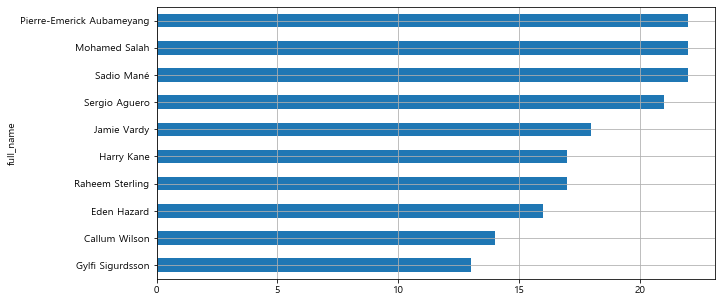

In [5]:
organize_data('goals_overall')

### organize_data() 함수를 이용하여 각종 데이터에 접근하게 해주는 함수 menu1()

In [6]:
def menu_1():
    
    
    while(1): 
        print("보고 싶은 정보의 번호를 입력해주세요")
        print("1 : 나이")
        print("2 : 뛴 경기 시간")
        print("3 : 뛴 경기수")
        print("4 : 골 수")
        print("5 : 어시스트 수")
        print("6 : 페널티골 수")
        print("7 : 클린시트 수")
        print("8 : 옐로우카드 수")
        print("9 : 레드카드 수")
        print("0 : 종료")
        
        data_type = input("보고 싶은 정보를 입력해주세요: ")
        
        if(data_type == '1'):
            data = "age"
        elif(data_type == '2'):
            data = "minutes_played_overall"
        elif(data_type == '3'):
            data = "appearances_overall"
        elif(data_type == '4'):
            data = "goals_overall"
        elif(data_type == '5'):
            data = "assists_overall"
        elif(data_type == '6'):
            data = "penalty_goals"
        elif(data_type == '7'):
            data = "clean_sheets_overall"
        elif(data_type == '8'):
            data = "yellow_cards_overall"
        elif(data_type == '9'):
            data = "red_cards_overall"
        elif(data_type == '0'):
            print("감사합니다")
            break
        else:
            print("잘못된 입력입니다")
            print("")
            continue
            
            
        organize_data(data)

### 실행해보기

보고 싶은 정보의 번호를 입력해주세요
1 : 나이
2 : 뛴 경기 시간
3 : 뛴 경기수
4 : 골 수
5 : 어시스트 수
6 : 페널티골 수
7 : 클린시트 수
8 : 옐로우카드 수
9 : 레드카드 수
0 : 종료
보고 싶은 정보를 입력해주세요: 7


,순위,full_name,Current Club,nationality,clean_sheets_overall
0,1,Virgil van Dijk,Liverpool,Netherlands,21
1,1,Alisson Becker,Liverpool,Brazil,21
2,1,Andrew Robertson,Liverpool,Scotland,21
3,1,Mohamed Salah,Liverpool,Egypt,21
4,1,Georginio Wijnaldum,Liverpool,Netherlands,21
5,6,Sadio Mané,Liverpool,Senegal,20
6,6,Ederson,Manchester City,Brazil,20
7,8,Sergio Aguero,Manchester City,Argentina,19
8,8,Jordan Henderson,Liverpool,England,19
9,10,Raheem Sterling,Manchester City,England,18


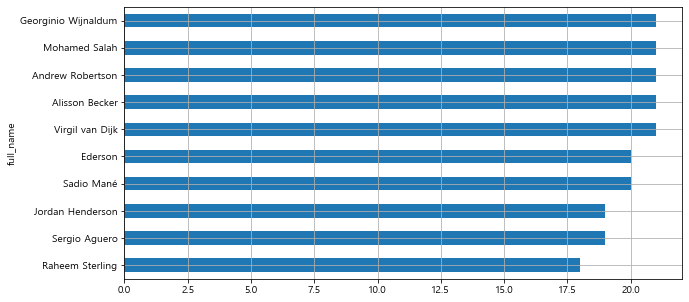

보고 싶은 정보의 번호를 입력해주세요
1 : 나이
2 : 뛴 경기 시간
3 : 뛴 경기수
4 : 골 수
5 : 어시스트 수
6 : 페널티골 수
7 : 클린시트 수
8 : 옐로우카드 수
9 : 레드카드 수
0 : 종료
보고 싶은 정보를 입력해주세요: 0
감사합니다


In [17]:
menu_1()

#  II) 잘 분석되지 않는 데이터 시각화해보기

### 심판의 성향 분석해보기(사용 카드 수에 따라)

,심판,경기당 카드수
1,Mike Dean,4.966
2,Roger East,4.400
3,Craig Pawson,3.808
4,Jonathan Moss,3.778
5,Kevin Friend,3.519
6,Paul Tierney,3.458
7,Lee Mason,3.368
8,Anthony Taylor,3.219
9,Chris Kavanagh,3.208
10,Stuart Attwell,3.200


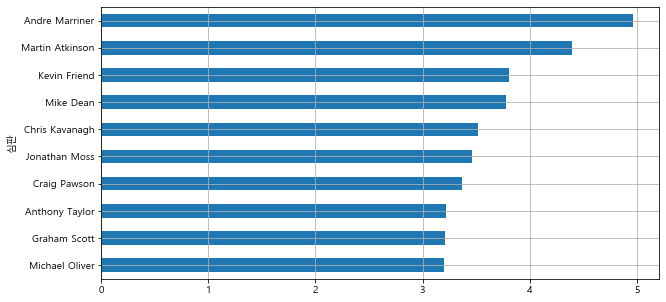

In [8]:
# 경기 데이터 불러오기
Matches_Data = pd.read_csv('epl_matches_18_19.csv')

# 심판, 카드 데이터만 따로 추출하기
referee = Matches_Data[['referee', 'home_team_yellow_cards', 'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards']]

# 심판별로 총 카드수(홈경기 엘로우카드 + 홈경기 레드카드 + 원정경기 옐로우카드 + 원정경기 레드카드) 계산하고, 그 값을 심판이 뛴 경기수로
# 나눠서(총 카드수/경기수) 각 심판이 경기당 준 카드의 수를 계산한다.
ref_list = []
cards_list = []
match_number = []


for i in range(0, 380):
    total = referee.iloc[i , 1] + referee.iloc[i , 2] + referee.iloc[i , 3] + referee.iloc[i , 4]
    if(referee.iloc[i , 0] not in ref_list):
        ref_list.append(referee.iloc[i , 0])
        cards_list.append(total)
        match_number.append(1)
    else:
        for j in range(0, len(ref_list)):
            if(referee.iloc[i , 0] == ref_list[j]):
                cards_list[j] += total
                match_number[j] += 1
    
cards_per_match = [0]*len(ref_list)

for i in range(0, len(ref_list)):
    cards_per_match[i] = round(cards_list[i]/match_number[i], 3)
    #print(ref_list[i])
    #print(cards_per_match[i])
    
# 경기당 카드수 많은 순서로 심판들 정렬하기
rank = []
for i in range(1, 19):
    rank.append(i)
    
referee_trait = pd.DataFrame({'심판': ref_list, '경기당 카드수': cards_per_match})
x = referee_trait.sort_values(by = '경기당 카드수', ascending = False)
x.index = rank

display(x.head(10))

x.index = referee_trait['심판']
x.head(10)['경기당 카드수'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 5))
plt.show()

,심판,경기당 카드수
1,Mike Dean,4.966
2,Roger East,4.400
3,Craig Pawson,3.808
4,Jonathan Moss,3.778
5,Kevin Friend,3.519
6,Paul Tierney,3.458
7,Lee Mason,3.368
8,Anthony Taylor,3.219
9,Chris Kavanagh,3.208
10,Stuart Attwell,3.200


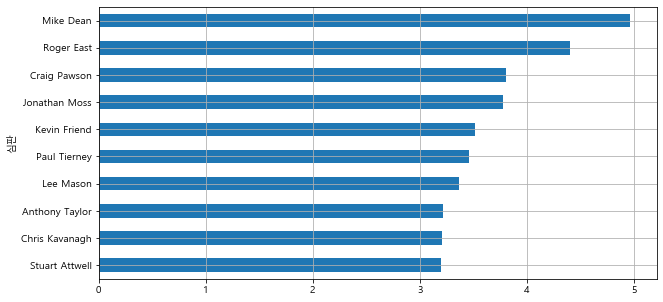

In [9]:
# 심판별로 총 카드수(홈경기 엘로우카드 + 홈경기 레드카드 + 원정경기 옐로우카드 + 원정경기 레드카드) 계산하고, 그 값을 심판이 뛴 경기수로
# 나눠서(총 카드수/경기수) 각 심판이 경기당 준 카드의 수를 계산한다.
ref_list = []
cards_list = []
match_number = []


for i in range(0, 380):
    total = referee.iloc[i , 1] + referee.iloc[i , 2] + referee.iloc[i , 3] + referee.iloc[i , 4]
    if(referee.iloc[i , 0] not in ref_list):
        ref_list.append(referee.iloc[i , 0])
        cards_list.append(total)
        match_number.append(1)
    else:
        for j in range(0, len(ref_list)):
            if(referee.iloc[i , 0] == ref_list[j]):
                cards_list[j] += total
                match_number[j] += 1
    
cards_per_match = [0]*len(ref_list)

for i in range(0, len(ref_list)):
    cards_per_match[i] = round(cards_list[i]/match_number[i], 3)
    #print(ref_list[i])
    #print(cards_per_match[i])
    
# 경기당 카드수 많은 순서로 심판들 정렬하기
rank = []
for i in range(1, 19):
    rank.append(i)
    
referee_trait = pd.DataFrame({'심판': ref_list, '경기당 카드수': cards_per_match})
x = referee_trait.sort_values(by = '경기당 카드수', ascending = False)
x.index = rank

display(x.head(10))

x.index = x['심판']
x.head(10)['경기당 카드수'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 5))
plt.show()

#  III) 히트맵으로 최종 순위와 연관성 높은 데이터 찾기

### 직관적으로 순위와 관련 높은 데이터 분류

In [10]:
# 히트맵 사용하기 위해
import seaborn as sns 

#팀 데이터 불러오기
Teams_Data = pd.read_csv('epl_teams_18_19.csv')

Teams_Data.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 280 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   team_name                                object 
 1   common_name                              object 
 2   season                                   object 
 3   country                                  object 
 4   matches_played                           int64  
 5   matches_played_home                      int64  
 6   matches_played_away                      int64  
 7   suspended_matches                        int64  
 8   wins                                     int64  
 9   wins_home                                int64  
 10  wins_away                                int64  
 11  draws                                    int64  
 12  draws_home                               int64  
 13  draws_away                               int64  
 14  losses                     

In [11]:
# 직관적으로 승리와 관련 있을 것 같은 요소들만 따로 분류하기
relatives = Teams_Data[['league_position', 'points_per_game', 'goals_scored', 'goals_conceded', 'goal_difference', 
                        'clean_sheets', 'average_possession', 'shots', 'shots_on_target']]

                    league_position  points_per_game  goals_scored  \
league_position            1.000000        -0.954118     -0.900407   
points_per_game           -0.954118         1.000000      0.971124   
goals_scored              -0.900407         0.971124      1.000000   
goals_conceded             0.906426        -0.922231     -0.831100   
goal_difference           -0.943743         0.990912      0.962685   
clean_sheets              -0.717073         0.807763      0.761770   
average_possession        -0.846605         0.853584      0.864491   
shots                     -0.799502         0.813270      0.783372   
shots_on_target           -0.879264         0.905648      0.910735   

                    goals_conceded  goal_difference  clean_sheets  \
league_position           0.906426        -0.943743     -0.717073   
points_per_game          -0.922231         0.990912      0.807763   
goals_scored             -0.831100         0.962685      0.761770   
goals_conceded         

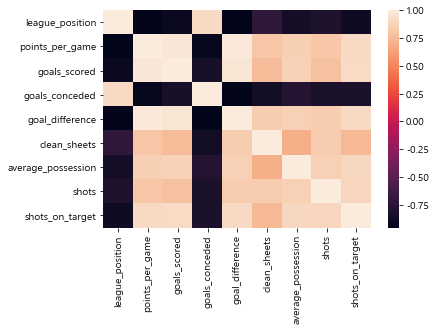

In [12]:
print(relatives.corr())
sns.heatmap(relatives.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   new_league_position  20 non-null     int64  
 1   points_per_game      20 non-null     float64
 2   goals_scored         20 non-null     int64  
 3   new_goals_conceded   20 non-null     int64  
 4   goal_difference      20 non-null     int64  
 5   clean_sheets         20 non-null     int64  
 6   average_possession   20 non-null     int64  
 7   shots                20 non-null     int64  
 8   shots_on_target      20 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 1.5 KB
                     new_league_position  points_per_game  goals_scored  \
new_league_position             1.000000         0.954118      0.900407   
points_per_game                 0.954118         1.000000      0.971124   
goals_scored                    0.900407         0.971124      1.000000  

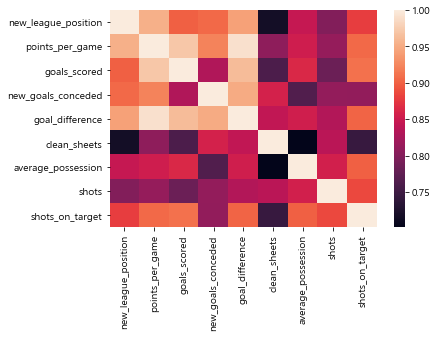

In [13]:
# 위 히트맵이 이상한 이유: 팀 순위, 실점은 적을수록 좋기 떄문에 높을수록 좋은 다른 데이터와 연관이 있을 수 없음
# > 팀 순위, 실점을 각각 (20- 팀순위), -(실점) 으로 바꿔서 높을수록 좋은 데이터로 바꿨음.
# > 결과: 아래에 정상적인 히트맵이 출력되었음

Teams_Data['new_league_position'] = 20 - Teams_Data['league_position']
Teams_Data['new_goals_conceded'] =  -Teams_Data['goals_conceded']

new_relatives = Teams_Data[['new_league_position', 'points_per_game', 'goals_scored', 'new_goals_conceded', 'goal_difference', 'clean_sheets', 'average_possession', 'shots', 'shots_on_target']]
                                        
new_relatives.info()

print(new_relatives.corr())
sns.heatmap(new_relatives.corr())              

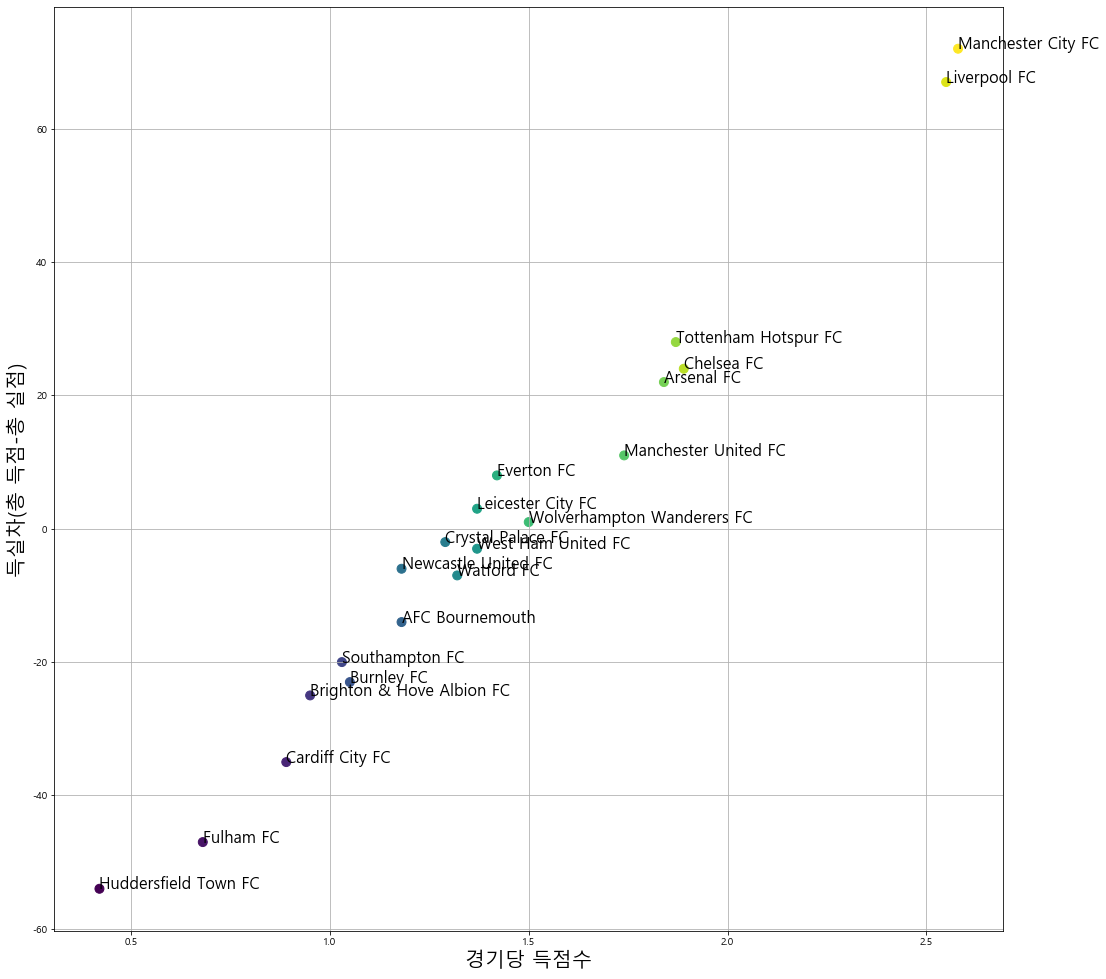

In [16]:
# 히트맵을 분석한 결과, 리그 순위 항목('new_league_position')과 가장 연관성이 높았던 데이터는 points_per_game(경기당 득점, 0.954118), 
# goal_difference(득실 차, 0.943743) 이었다. 이 두 데이터를 이용하여 리그의 팀 20개를 그래프 상에 배치하여 각 팀의 경기력을 보기 쉽게
# 시각화해보기로 하였다.

plt.figure(figsize=(17,17))
plt.scatter(Teams_Data['points_per_game'], Teams_Data['goal_difference'],c = new_relatives['new_league_position'], s = 80)

for i in range(20):
    plt.text(Teams_Data['points_per_game'][i], Teams_Data['goal_difference'][i], Teams_Data['team_name'][i], fontsize = 16)

plt.xlabel('경기당 득점수', fontsize = 20)
plt.ylabel('득실차(총 득점-총 실점)', fontsize = 20)

plt.grid()
plt.show()

In [80]:
# 그래프 생성 결과, 각 팀의 경기력을 한 눈에 보기 쉽게 되었다. 특히 프로젝트 초반부에 언급했던 맨체스터 시티와 리버풀간의 2파전이라는
# 것도 잘 드러난다.